In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.081793,1.651636,-1.772786,-1.718593,-1.073071,0
1,0.775866,1.252451,-1.675645,-0.891846,-1.252872,0
2,-1.429632,0.235269,-2.928479,-4.098447,0.043766,1
3,-2.107864,-1.797353,0.425863,-0.070391,1.364346,1
4,0.613481,-1.947747,0.064338,2.169454,0.507261,1


In [4]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [5]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [6]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [7]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\NIKUNJ KIKANI\AppData\Local\Temp\ipykernel_4588\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [8]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\NIKUNJ KIKANI\AppData\Local\Temp\ipykernel_4588\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [9]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\NIKUNJ KIKANI\AppData\Local\Temp\ipykernel_4588\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [10]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col3', 'col4', 'target'], dtype='object')
Index(['col2', 'col1', 'target'], dtype='object')
Index(['col3', 'col1', 'target'], dtype='object')


In [11]:
df3

,col3,col1,target
54,0.033278,-2.631298,0
56,-1.085147,1.023154,1
77,-0.761830,-1.595704,0
57,-2.812099,1.825549,0
30,0.155494,0.029262,1
30,0.155494,0.029262,1
27,-1.937513,-2.245488,0
49,-1.008432,-2.401337,0
40,-0.214151,0.304434,1
79,-0.393484,-1.808015,1


In [12]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [13]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [14]:
from sklearn.tree import plot_tree

[Text(0.4166666666666667, 0.9666666666666667, 'X[0] <= -2.306\ngini = 0.487\nsamples = 50\nvalue = [29, 21]'),
 Text(0.16666666666666666, 0.9, 'X[1] <= -0.943\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.08333333333333333, 0.8333333333333334, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.25, 0.8333333333333334, 'X[1] <= 0.233\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.7666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.7666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.9, 'X[1] <= -0.041\ngini = 0.433\nsamples = 41\nvalue = [28, 13]'),
 Text(0.5833333333333334, 0.8333333333333334, 'X[0] <= -1.822\ngini = 0.491\nsamples = 30\nvalue = [17, 13]'),
 Text(0.5, 0.7666666666666667, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6666666666666666, 0.7666666666666667, 'X[1] <= -3.892\ngini = 0.499\nsamples = 25\nvalue = [12, 13]'),
 Text(0.5833333333333334, 0.7, 'gini = 

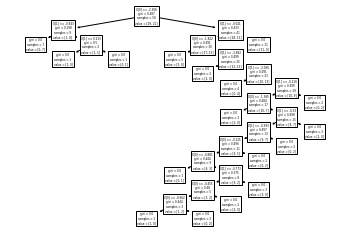

In [15]:
plot_tree(clf1)

[Text(0.5, 0.9166666666666666, 'X[0] <= 0.039\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.3333333333333333, 0.75, 'X[0] <= -1.123\ngini = 0.298\nsamples = 33\nvalue = [6, 27]'),
 Text(0.16666666666666666, 0.5833333333333334, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.5, 0.5833333333333334, 'X[0] <= -1.007\ngini = 0.444\nsamples = 18\nvalue = [6, 12]'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.4166666666666667, 'X[1] <= -1.813\ngini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(0.5, 0.25, 'X[1] <= -3.306\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8333333333333334, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.6666666666666666, 0.75, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]')]

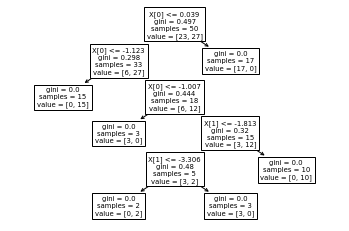

In [16]:
plot_tree(clf2)

[Text(0.4166666666666667, 0.9444444444444444, 'X[1] <= -1.935\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.25, 0.8333333333333334, 'X[0] <= 0.987\ngini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(0.16666666666666666, 0.7222222222222222, 'X[0] <= -2.219\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.08333333333333333, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.6111111111111112, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.3333333333333333, 0.7222222222222222, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5833333333333334, 0.8333333333333334, 'X[1] <= -1.602\ngini = 0.484\nsamples = 34\nvalue = [14, 20]'),
 Text(0.5, 0.7222222222222222, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6666666666666666, 0.7222222222222222, 'X[0] <= -0.745\ngini = 0.499\nsamples = 29\nvalue = [14, 15]'),
 Text(0.5, 0.6111111111111112, 'X[0] <= -0.852\ngini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.4166666666666667, 0.5, '

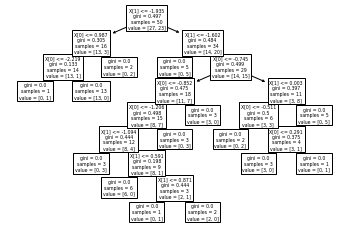

In [17]:
plot_tree(clf3)

In [18]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\NIKUNJ KIKANI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [19]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\NIKUNJ KIKANI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [20]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\NIKUNJ KIKANI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [21]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
57,1.825549,1.637292,-2.812099,-0.243751,-5.350879,0
33,-0.777890,1.107175,0.043130,-0.166879,-1.097257,0
45,0.574947,0.481174,-1.950412,0.282665,-2.032066,0
68,-0.609213,2.118280,-1.922578,-2.214954,-2.119489,0
94,-0.602693,-0.545927,-0.847380,-1.225177,-0.058418,1
51,-1.728185,-1.129349,0.882837,-0.201110,1.430754,1
13,-1.297838,-1.156967,-0.728041,-0.387379,0.828762,1
44,-2.250310,2.280353,-1.621640,-3.303755,-1.456148,0
44,-2.250310,2.280353,-1.621640,-3.303755,-1.456148,0
75,-3.980411,-0.245090,1.019455,-3.695851,4.225935,1
